# load dataset

In [1]:
import pandas as pd
df1 = pd.read_csv("student-scores-cleaned.csv")
df = df1.copy()
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,7,Anthony,Smith,anthony.smith.7@gslingacademy.com,male,False,3,True,23,Software Engineer,99,96,97,73,88,76,64


In [2]:
print(df.isnull().sum())

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64


# drop irrelevant columns

In [3]:
df.columns
df.drop(columns=['id','first_name','last_name','email'],axis=1, inplace=True)

# create new features from all score

In [4]:
df["total_score"] = df["math_score"] + df["history_score"] + df["physics_score"] + df["chemistry_score"] + df["biology_score"] + df["english_score"] + df["geography_score"]
df["average_score"] = df["total_score"] / 7
df.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,total_score,average_score
0,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,574,82.000000
1,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,640,91.428571
2,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,605,86.428571
3,female,False,5,False,3,Artist,71,74,88,80,89,63,86,551,78.714286
4,male,False,3,True,23,Software Engineer,99,96,97,73,88,76,64,593,84.714286


In [5]:
df.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,total_score,average_score
0,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,574,82.000000
1,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,640,91.428571
2,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,605,86.428571
3,female,False,5,False,3,Artist,71,74,88,80,89,63,86,551,78.714286
4,male,False,3,True,23,Software Engineer,99,96,97,73,88,76,64,593,84.714286


# Encoding Categorical Columns

In [6]:
# from sklearn.preprocessing import LabelEncoder

# # Create a LabelEncoder object
# label_encoder = LabelEncoder()

# # Encode categorical columns using label encoder
# df['gender'] = label_encoder.fit_transform(df['gender'])
# df['part_time_job'] = label_encoder.fit_transform(df['part_time_job'])
# df['extracurricular_activities'] = label_encoder.fit_transform(df['extracurricular_activities'])
# df['career_aspiration'] = label_encoder.fit_transform(df['career_aspiration'])
# Define mapping dictionaries for categorical features
gender_map = {'male': 0, 'female': 1}
part_time_job_map = {False: 0, True: 1}
extracurricular_activities_map = {False: 0, True: 1}
career_aspiration_map = {
        'Lawyer': 0, 'Doctor': 1, 'Government Officer': 2, 'Artist': 3,
        'Software Engineer': 4, 'Teacher': 5, 'Business Owner': 6, 'Scientist': 7,
        'Banker': 8, 'Writer': 9, 'Accountant': 10, 'Designer': 11,
        'Construction Engineer': 12, 'Game Developer': 13, 'Stock Investor': 14,
        'Real Estate Developer': 15
    }
# Apply mapping to the DataFrame
df['gender'] = df['gender'].map(gender_map)
df['part_time_job'] = df['part_time_job'].map(part_time_job_map)
df['extracurricular_activities'] = df['extracurricular_activities'].map(extracurricular_activities_map)
df['career_aspiration'] = df['career_aspiration'].map(career_aspiration_map)

In [7]:
df.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,total_score,average_score
0,0,0,3,0,27,0,73,81,93,97,63,80,87,574,82.000000
1,1,0,2,0,47,1,90,86,96,100,90,88,90,640,91.428571
2,1,0,9,1,13,2,81,97,95,96,65,77,94,605,86.428571
3,1,0,5,0,3,3,71,74,88,80,89,63,86,551,78.714286
4,0,0,3,1,23,4,99,96,97,73,88,76,64,593,84.714286


# Balance Dataset

In [8]:
df['career_aspiration'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [9]:
df['career_aspiration'].value_counts()

,count
career_aspiration,
4,315
6,309
8,169
0,138
10,126
1,119
15,83
14,73
12,68


In [10]:
from imblearn.over_sampling import SMOTE

# Create SMOTE object
smote = SMOTE(random_state=42)

# Separate features and target variable
X = df.drop('career_aspiration', axis=1)
y = df['career_aspiration']

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train test Split

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2, random_state=42)

In [12]:
X_train.shape

(4032, 14)

# Feature Scalling

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_scaled.shape

(4032, 14)

# Models Training (Multiple Models)

Model: Logistic Regression
Accuracy: 0.5267857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.60      0.58        57
           1       0.61      0.66      0.64        74
           2       0.42      0.37      0.40        59
           3       0.60      0.67      0.63        66
           4       0.48      0.32      0.38        73
           5       0.60      0.87      0.71        69
           6       0.85      0.88      0.87        60
           7       0.55      0.57      0.56        61
           8       0.32      0.16      0.22        62
           9       0.44      0.68      0.54        59
          10       0.64      0.47      0.54        74
          11       0.30      0.22      0.25        65
          12       0.28      0.49      0.35        47
          13       0.60      0.89      0.72        56
          14       0.38      0.21      0.27        58
          15       0.57      0.40      0.47        68



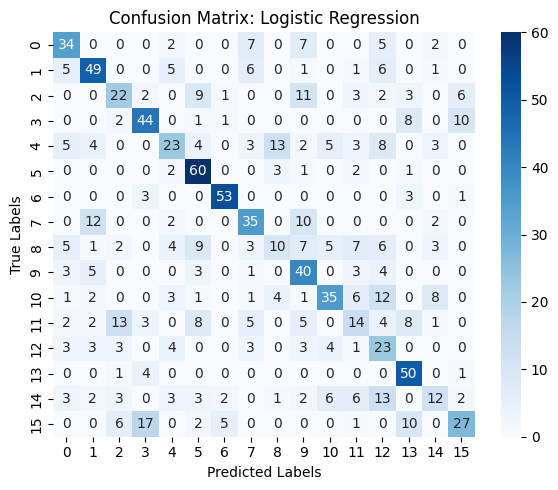

Model: Support Vector Classifier
Accuracy: 0.6736111111111112
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67        57
           1       0.64      0.76      0.70        74
           2       0.69      0.73      0.71        59
           3       0.70      0.74      0.72        66
           4       0.50      0.34      0.41        73
           5       0.72      0.93      0.81        69
           6       0.85      0.93      0.89        60
           7       0.70      0.79      0.74        61
           8       0.46      0.31      0.37        62
           9       0.80      0.86      0.83        59
          10       0.95      0.47      0.63        74
          11       0.61      0.54      0.57        65
          12       0.48      0.74      0.58        47
          13       0.82      0.91      0.86        56
          14       0.60      0.52      0.56        58
          15       0.66      0.57      0.61      

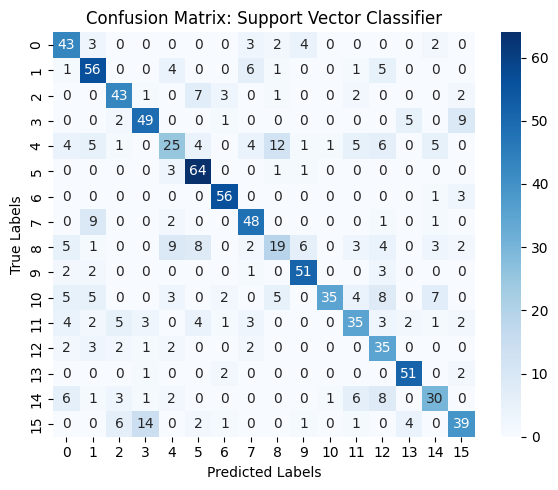

Model: Random Forest Classifier
Accuracy: 0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88        57
           1       0.89      0.95      0.92        74
           2       0.89      0.85      0.87        59
           3       0.90      0.97      0.93        66
           4       0.74      0.44      0.55        73
           5       0.74      0.99      0.84        69
           6       0.97      0.93      0.95        60
           7       0.88      1.00      0.94        61
           8       0.76      0.61      0.68        62
           9       0.89      0.97      0.93        59
          10       0.95      0.80      0.87        74
          11       0.90      0.82      0.85        65
          12       0.74      0.96      0.83        47
          13       0.90      0.96      0.93        56
          14       0.82      0.86      0.84        58
          15       0.92      0.79      0.85       

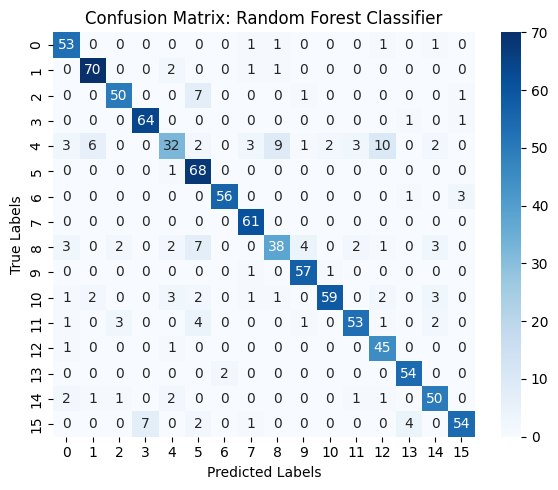

Model: Decision Tree Classifier
Accuracy: 0.7043650793650794
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.61      0.64        57
           1       0.81      0.81      0.81        74
           2       0.64      0.64      0.64        59
           3       0.79      0.76      0.78        66
           4       0.40      0.27      0.33        73
           5       0.76      0.90      0.82        69
           6       0.86      0.83      0.85        60
           7       0.89      0.93      0.91        61
           8       0.47      0.45      0.46        62
           9       0.85      0.88      0.87        59
          10       0.68      0.66      0.67        74
          11       0.58      0.69      0.63        65
          12       0.68      0.72      0.70        47
          13       0.84      0.86      0.85        56
          14       0.59      0.71      0.64        58
          15       0.72      0.60      0.66       

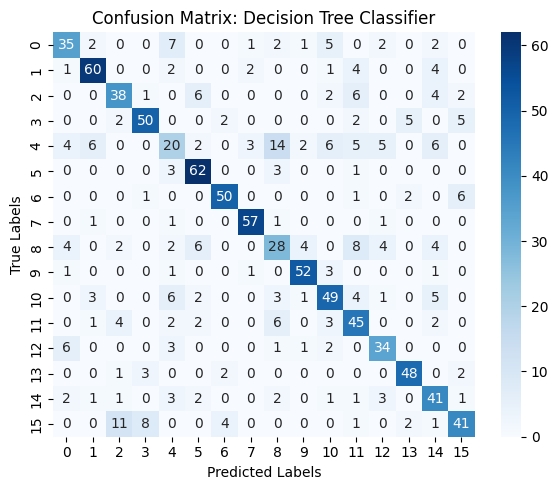

Model: Gradient Boosting Classifier
Accuracy: 0.7549603174603174
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.84      0.77        57
           1       0.86      0.91      0.88        74
           2       0.72      0.80      0.76        59
           3       0.83      0.88      0.85        66
           4       0.58      0.47      0.52        73
           5       0.76      0.99      0.86        69
           6       0.96      0.90      0.93        60
           7       0.78      1.00      0.88        61
           8       0.51      0.31      0.38        62
           9       0.82      0.90      0.85        59
          10       0.90      0.58      0.70        74
          11       0.74      0.62      0.67        65
          12       0.58      0.74      0.65        47
          13       0.79      0.95      0.86        56
          14       0.68      0.67      0.68        58
          15       0.74      0.62      0.67   

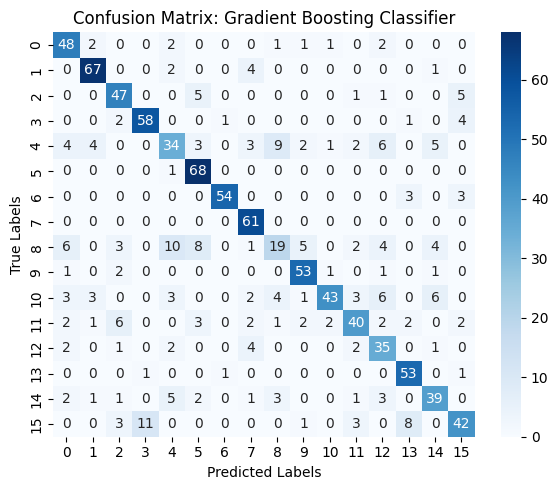

Model: XGBoost Classifier
Accuracy: 0.8541666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88        57
           1       0.89      0.89      0.89        74
           2       0.85      0.90      0.88        59
           3       0.95      0.94      0.95        66
           4       0.61      0.52      0.56        73
           5       0.84      0.94      0.89        69
           6       0.98      0.90      0.94        60
           7       0.90      0.98      0.94        61
           8       0.72      0.55      0.62        62
           9       0.89      0.95      0.92        59
          10       0.88      0.76      0.81        74
          11       0.90      0.86      0.88        65
          12       0.81      0.98      0.88        47
          13       0.89      0.98      0.93        56
          14       0.82      0.81      0.82        58
          15       0.88      0.85      0.87        68

 

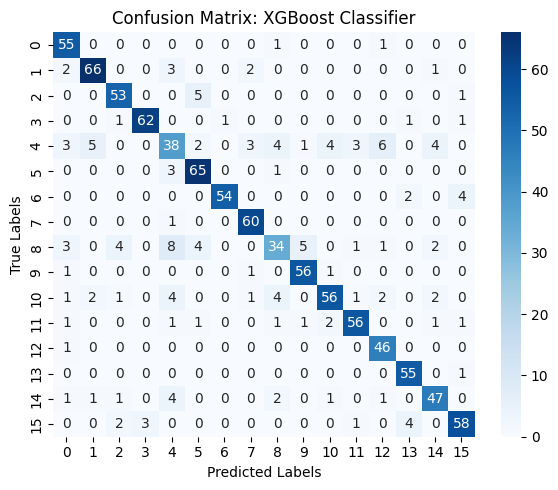

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Train and evaluate each model
for name, model in models.items():
    print("="*50)
    print("Model:", name)
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict on test set
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print metrics
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_rep)
    print("Confusion Matrix:\n", conf_matrix)

    # Plot confusion matrix
    labels = sorted(list(set(y_test)))
    conf_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)

    plt.figure(figsize=(6,5))
    sns.heatmap(conf_df, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.tight_layout()
    plt.show()


# Model Selection (Random Forest)

In [ ]:
model = RandomForestClassifier()

model.fit(X_train_scaled, y_train)
# Predict on test set
y_pred = model.predict(X_test_scaled)

# Calculate metrics
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Report: ",classification_report(y_test, y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))

Accuracy:  0.8591269841269841
Report:                precision    recall  f1-score   support

           0       0.80      0.91      0.85        57
           1       0.91      0.95      0.93        74
           2       0.88      0.85      0.86        59
           3       0.90      0.95      0.93        66
           4       0.72      0.49      0.59        73
           5       0.75      0.96      0.84        69
           6       1.00      0.93      0.97        60
           7       0.86      1.00      0.92        61
           8       0.74      0.55      0.63        62
           9       0.85      0.97      0.90        59
          10       0.97      0.80      0.87        74
          11       0.95      0.86      0.90        65
          12       0.79      0.96      0.87        47
          13       0.90      0.98      0.94        56
          14       0.83      0.90      0.86        58
          15       0.90      0.79      0.84        68

    accuracy                           0.

# Single Input Predictions

In [ ]:
# test 1
print("Actual Label :", y_test.iloc[10])
print("Model Prediction :",model.predict(X_test_scaled[10].reshape(1,-1))[0])
if y_test.iloc[10]==model.predict(X_test_scaled[10].reshape(1,-1)):
    print("Wow! Model doing well.....")
else:
    print("not sure......")

Actual Label : 12
Model Prediction : 12
Wow! Model doing well.....


In [ ]:
# test 2
print("Actual Label :", y_test.iloc[300])
print("Model Prediction :",model.predict(X_test_scaled[300].reshape(1,-1))[0])
if y_test.iloc[10]==model.predict(X_test_scaled[10].reshape(1,-1)):
    print("Wow! Model doing well.....")
else:
    print("not sure......")

Actual Label : 4
Model Prediction : 5
Wow! Model doing well.....


In [ ]:
# test 2
print("Actual Label :", y_test.iloc[23])
print("Model Prediction :",model.predict(X_test_scaled[23].reshape(1,-1))[0])
if y_test.iloc[10]==model.predict(X_test_scaled[10].reshape(1,-1)):
    print("Wow! Model doing well.....")
else:
    print("not sure......")

Actual Label : 0
Model Prediction : 0
Wow! Model doing well.....


# Saving & Load Files

In [ ]:
import pickle
import joblib

# SAVE FILES
joblib.dump(scaler, "scaler.sav")
joblib.dump(model, "model.sav")

['model.sav']

In [ ]:

# Load the scaler, label encoder, and model
scaler = joblib.load("scaler.sav")
model = joblib.load("model.sav")

# Recommendation System

In [ ]:
import pickle
import numpy as np

# Load the scaler, label encoder, model, and class names
scaler = joblib.load("scaler.sav")
model = joblib.load("model.sav")
class_names = ['Lawyer', 'Doctor', 'Government Officer', 'Artist', 'Unknown',
               'Software Engineer', 'Teacher', 'Business Owner', 'Scientist',
               'Banker', 'Writer', 'Accountant', 'Designer',
               'Construction Engineer', 'Game Developer', 'Stock Investor',
               'Real Estate Developer']

def map_to_major(career):
    career = career.lower()
    if "engineer" in career or "scientist" in career or "developer" in career:
        return "Teknik"
    elif "doctor" in career or "nurse" in career:
        return "Kesehatan"
    elif "lawyer" in career or "government" in career or "politician" in career:
        return "Sosial"
    elif "artist" in career or "writer" in career or "designer" in career:
        return "Humaniora"
    elif "teacher" in career or "professor" in career:
        return "Pendidikan"
    elif "business" in career or "entrepreneur" in career or "accountant" in career or "banker" in career or "investor" in career:
        return "Ekonomi"
    else:
        return "Lainnya"

def Recommendations(gender, part_time_job, absence_days, extracurricular_activities,
                    weekly_self_study_hours, math_score, history_score, physics_score,
                    chemistry_score, biology_score, english_score, geography_score,
                    total_score, average_score):

    # Encode categorical variables
    gender_encoded = 1 if gender.lower() == 'female' else 0
    part_time_job_encoded = 1 if part_time_job else 0
    extracurricular_activities_encoded = 1 if extracurricular_activities else 0

    # Create feature array
    feature_array = np.array([[gender_encoded, part_time_job_encoded, absence_days, extracurricular_activities_encoded,
                               weekly_self_study_hours, math_score, history_score, physics_score,
                               chemistry_score, biology_score, english_score, geography_score,
                               total_score, average_score]])

    # Scale features
    scaled_features = scaler.transform(feature_array)

    # Predict using the model
    probabilities = model.predict_proba(scaled_features)

    # Get top five predicted classes along with their probabilities
    top_classes_idx = np.argsort(-probabilities[0])[:5]
    top_classes_names_probs = [(class_names[idx], probabilities[0][idx]) for idx in top_classes_idx]

    # Ambil rekomendasi jurusan dari karier teratas
    top_career = top_classes_names_probs[0][0]
    recommended_major = map_to_major(top_career)

    # Tampilkan hasil
    print("📌 Prediksi Karier Teratas:")
    for career, prob in top_classes_names_probs:
        print(f"- {career}: {prob*100:.2f}%")

    print(f"\n🎓 Rekomendasi Jurusan: {recommended_major}")

    return top_classes_names_probs, recommended_major


In [ ]:
# Example usage
top_classes_names_probs, recommended_major = Recommendations(gender='female',
                                        part_time_job=False,
                                        absence_days=2,
                                        extracurricular_activities=False,
                                        weekly_self_study_hours=7,
                                        math_score=65,
                                        history_score=60,
                                        physics_score=97,
                                        chemistry_score=94,
                                        biology_score=71,
                                        english_score=81,
                                        geography_score=66,
                                        total_score=534,
                                        average_score=76.285714)

print("Top recommended studies with probabilities:")
print("="*50)
# Iterate through the list of career and probability tuples
for class_name, probability in top_classes_names_probs:
    print(f"{class_name} with probability {probability}")

📌 Prediksi Karier Teratas:
- Software Engineer: 84.00%
- Government Officer: 7.00%
- Stock Investor: 5.00%
- Teacher: 2.00%
- Accountant: 2.00%

🎓 Rekomendasi Jurusan: Teknik
Top recommended studies with probabilities:
Software Engineer with probability 0.84
Government Officer with probability 0.07
Stock Investor with probability 0.05
Teacher with probability 0.02
Accountant with probability 0.02
